#### IE 7275 - Assignment 5 - Clustering model

In [2]:
from datetime import date
studentName="Qi Li"
studentEmail="li.qi8@northeastern.edu"
homework=5
contributedPercentage=100
print("IE 7275: Data mining in Engineering")
print("\n"*15)
print(f'Homework - {homework}')
print(f'Student name : {studentName}')
print(f'Student Email : {studentEmail}')
print("\n"*15)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7275: Data mining in Engineering
















Homework - 5
Student name : Qi Li
Student Email : li.qi8@northeastern.edu
















Percentage of Effort Contributed by Student : 100%
Submission Date: 2023-04-11


## Import packages

In [29]:
import pandas as pd
import numpy as np
from sklearn import metrics
import math
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
sns.set()

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Problem 1

Dataset - <A href="https://www3.nd.edu/~busiforc/handouts/DataMining/EastWestAirlinesCluster.xlsx">East West Airlines</A>

a) Perform clustering (Hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters

b) East-West Airlines is trying to learn more about its customers. Key issues are their flying patterns, earning and use of frequent flyer rewards, and use of the airline credit card. The task is to identify customer segments via clustering. The file EastWestAirlines.xls contains information on 4000 passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar charactersitics for the purpose of targeting different segments for different types of mileage offers.

In [4]:
# Load data
data = pd.read_excel(r'/Users/liqi/Desktop/IE7275/homework/hw5/EastWestAirlinesCluster.xlsx')
# List the first 5 records
data.head()
# Show the dimention of dataset
data.info()
# Show the shape of dataset
data.shape

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


(3999, 12)

In [17]:
class StandardScaler:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.var_ = np.var(X, axis=0)
        
    def transform(self, X):
        X_std = (X - self.mean_) / np.sqrt(self.var_)
        return X_std
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    
    def inverse_transform(self, X_std):
        X = X_std * np.sqrt(self.var_) + self.mean_
        return X

In [18]:
# Drop the ID and Award column and scale the data
X = data.drop(["ID#", "Award?"], axis=1)
X_scaled = scaler.fit_transform(X)
# Scale the data
standardScaler = StandardScaler()
std_df = standardScaler.fit_transform(data)
std_df.shape

(3999, 12)

### 1. Hierarchical

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

<Figure size 1000x700 with 0 Axes>

Text(0.5, 1.0, 'Dendrogram')

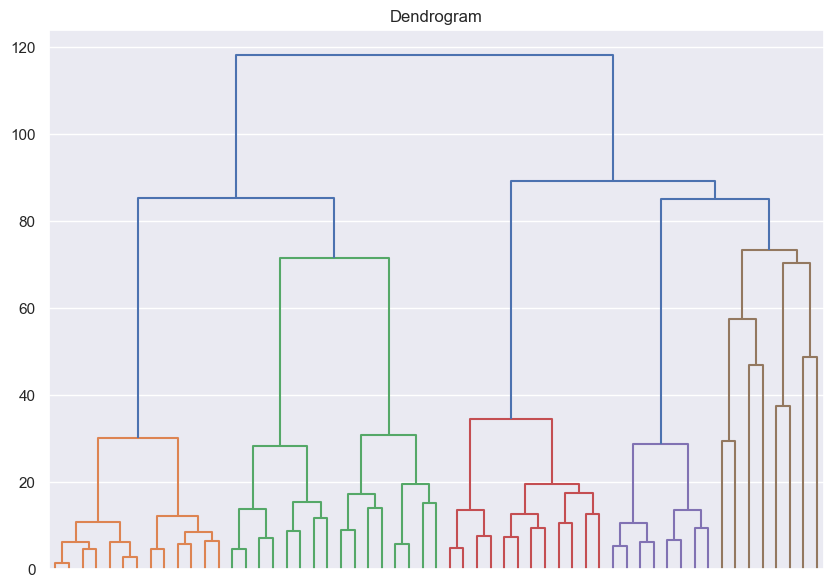

In [20]:
# Perform Hierarchical Clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(scaled_data)

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(
    linkage(scaled_data, method="ward"),
    truncate_mode="level",
    p=5,
    show_leaf_counts=False,
    no_labels=True,
)
plt.show()

Hierarchical Clustering suggests that the data can be divided into 5 clusters. This is based on the largest vertical distances in the dendrogram that don't intersect any horizontal lines. Choosing 4 clusters might result in a simpler model, while choosing 6 clusters might result in more nuanced patterns.

### 2. K-Means

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

<Figure size 1000x700 with 0 Axes>

Text(0.5, 1.0, 'Elbow Curve')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Inertia')

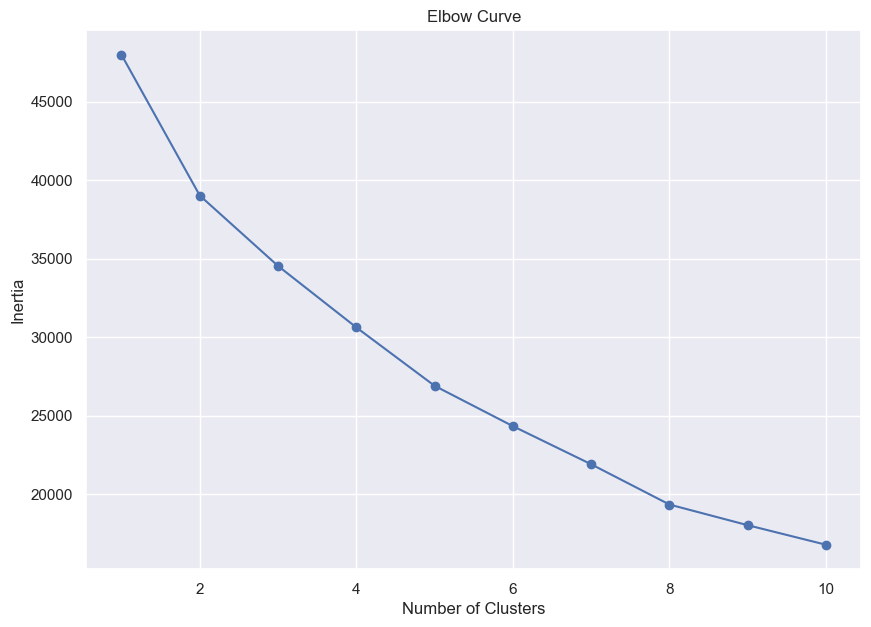

In [21]:
# Apply K-Means Clustering
inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertias.append(model.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), inertias, marker="o")
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [22]:
def k_means(k, X, centers=None, n_iteration=10000):
    if centers is None:
        random_Center_idx = np.random.choice(np.arange(X.shape[0]), k, replace=False)
        centers = X[random_Center_idx]
    for _ in range(n_iteration):
        distances = np.sum(np.sqrt((X - centers[:, np.newaxis]) ** 2), axis=-1)
        cluster_Label = np.argmin(distances, axis=0)
        for i in range(k):
            msk = (cluster_Label == i)
            centers[i] = np.mean(X[msk], axis=0) if np.any(msk) else centers[i]
        return cluster_Label
    
cluster_kmean = {}
for n_clusters in range(2, 10):
        cluster_kmean[n_clusters] = k_means(n_clusters, std_df.to_numpy())
        sil_score1= silhouette_score(std_df, cluster_kmean[n_clusters])
        print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.16818448902032143
For n_clusters = 3 The average silhouette_score is : 0.1741843294114511
For n_clusters = 4 The average silhouette_score is : 0.15959922603743812
For n_clusters = 5 The average silhouette_score is : 0.11252833851254412
For n_clusters = 6 The average silhouette_score is : 0.07647420434479882
For n_clusters = 7 The average silhouette_score is : 0.08771051730766388
For n_clusters = 8 The average silhouette_score is : 0.07330498973114338
For n_clusters = 9 The average silhouette_score is : 0.07326950889958439


We can see from above plot that, K-Means clustering suggests that the data can be divided into 3 clusters based on the elbow point in the elbow curve. We can also see from the silhouette score when K = 3, K mean algorithm has the higheset score. The silhouette score for 3 clusters is 0.18, which is the highest among all the tested values of n_clusters. However, the silhouette scores for all tested values of n_clusters are relatively low, which suggests that the clusters may not be well separated. So if we have to choose the K, the optimum number of clusters is 3.

### 3. DBSCAN

In [23]:
def DBSCAN(normalised_distance,e,k):
        DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalised_distance, 'euclidean'))
        core_point_array=np.zeros(len(DistanceMatrix))
        cluster_array=np.zeros(len(DistanceMatrix))
        PointNeighbors=[]
        w=0
        
        for i in range(len(DistanceMatrix)):
            PointNeighbors=np.where(DistanceMatrix[i]<=e)[0]
            if len(PointNeighbors)>=k:
                core_point_array[i]=1
                if cluster_array[i]==0:
                    cluster_array[i]=w 
                    w=w+1
                for x in range(len(PointNeighbors)):
                    if cluster_array[PointNeighbors[x]]==0:
                            cluster_array[PointNeighbors[x]]=cluster_array[i]
        for x in range(len(cluster_array)):
                cluster_array[x]=cluster_array[x]-1
        return cluster_array

cluster_DBscan=DBSCAN(std_df.to_numpy(), 3, 4)

In [24]:
sil_score3= silhouette_score(std_df, cluster_DBscan)
print("For DBSCAN, the silhouette score is :", sil_score3)

For DBSCAN, the silhouette score is : 0.24702225724809154


The silhouette score for DBSCAN measures how similar an object is to its own cluster compared to other clusters. A score of 0.247 indicates that the objects in the clusters are relatively well-clustered and separated from other clusters, but not highly distinct.

However, DBSCAN is a density-based clustering algorithm and does not require the number of clusters to be specified beforehand. Instead, it groups together points that are close to each other and marks them as core points. Points that are close to core points but not core points themselves are labeled as boundary points, and points that are not close to any core points are labeled as noise points.

Therefore, the silhouette score may not be the best metric for evaluating DBSCAN's performance. Instead, it's recommended to visually inspect the clusters and consider the density and distribution of points within each cluster to gain insights about the data.

### 4. Perform PCA

In [30]:
# Drop the ID and Award column and scale the data
X = data.drop(["ID#", "Award?"], axis=1)
X_scaled = scaler.fit_transform(X)
# Scale the data
standardScaler = StandardScaler()
std_df = standardScaler.fit_transform(data)
std_df.shape

(3999, 12)

In [48]:
# Perform PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Cluster the data using KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters} The average silhouette_score is : {silhouette_avg}")

PCA(n_components=2)

For n_clusters = 2 The average silhouette_score is : 0.4013999566327563
For n_clusters = 3 The average silhouette_score is : 0.38713396707885095
For n_clusters = 4 The average silhouette_score is : 0.4150720260371123
For n_clusters = 5 The average silhouette_score is : 0.387793428411501
For n_clusters = 6 The average silhouette_score is : 0.3940420055325296
For n_clusters = 7 The average silhouette_score is : 0.3824402117907218
For n_clusters = 8 The average silhouette_score is : 0.3870488347166585
For n_clusters = 9 The average silhouette_score is : 0.38772517268626117


We have dropped the column "ID#" and "Award?". It will then cluster the data using KMeans and calculate the silhouette score for each number of clusters from 2 to 9. Based on the silhouette scores, we can determine the optimal number of clusters for this dataset. The higher the silhouette score, the better the clustering. We can see by applying PCA, the highest silhouette score is 0.41 at clusters = 4, which is much higher than previous 0.11. Therefore, by reducing the number of dimensions, PCA can help identify underlying patterns or structure in the data that may not be apparent in the original feature space.

Additionally, by analyzing the PCA components, we can see that the first principal component is strongly positively correlated with Bonus miles, Bonus transactions, and Flight miles, while the second principal component is strongly positively correlated with Balance and Days since enrollment. This suggests that customers who have been enrolled for a longer time, have higher balances, and have earned more bonus miles tend to have similar behaviors. On the other hand, customers who fly more tend to have similar behaviors as well.

Overall, these insights can be used by marketers to tailor their loyalty programs and marketing campaigns to different customer segments based on their behavior patterns. For example, customers who tend to fly more can be targeted with promotions that encourage them to fly even more, while customers who have been enrolled for a long time and have high balances can be targeted with promotions that encourage them to redeem their miles.

## Problem 2

Dataset - Customerdata.csv

a) Perform clustering (Hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters

b) Customer data collected from a mall. They would like to find a different customer segments from this data and would like to help the customer efficiently. How do

In [66]:
# Load data
df = pd.read_csv(r'/Users/liqi/Desktop/IE7275/homework/hw5/Customersdata.csv')
# List the first 5 records
df.head()
# Show the dimention of dataset
df.info()
# Show the shape of dataset
df.shape

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(200, 5)

In [67]:
# Preprocess the data: use 0 to represent male and 1 to represent female
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
df.columns = ['CustomerID', 'Genre', 'Age', 'Annual_Income','Spending_Score']
# Drop the CustomerID collumn
X = df.drop(['CustomerID'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [68]:
# scale the data
scaler1 = StandardScaler()
scaled_data1 = scaler.fit_transform(df.iloc[:, 1:])
scaled_data1.shape

(200, 4)

### 1. Hierarchical

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

<Figure size 1000x700 with 0 Axes>

Text(0.5, 1.0, 'Dendrogram')

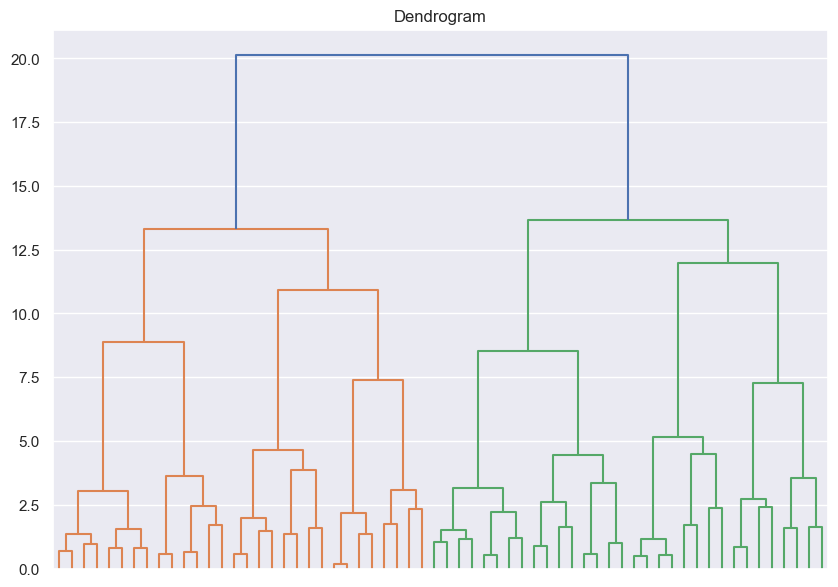

In [69]:
# Perform Hierarchical Clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(scaled_data1)

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(
    linkage(scaled_data1, method="ward"),
    truncate_mode="level",
    p=5,
    show_leaf_counts=False,
    no_labels=True,
)
plt.show()

We can see from the above plot that Hierarchical Clustering suggests that the data can be divided into 2 clusters. Choosing 1 clusters might result in a simpler model, while choosing 3 clusters might result in more nuanced patterns.

### 2. K-Means

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

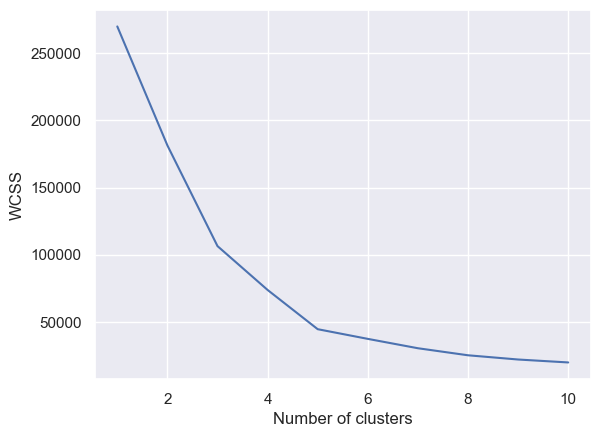

In [70]:
# use code provided by professor 

dataset = pd.read_csv('/Users/liqi/Desktop/IE7275/homework/hw5/Customersdata.csv') 
X = dataset.iloc[:, [3, 4]].values

# Using the elbow method to find the optimal number of clusters 
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss) 
plt.xlabel('Number of clusters') 

y_kmeans = kmeans.fit_predict(X)

plt.ylabel('WCSS') 
plt.show() 

Text(0.5, 0, 'Annual Income (k$)')

Text(0, 0.5, 'Spending Score (1-100)')

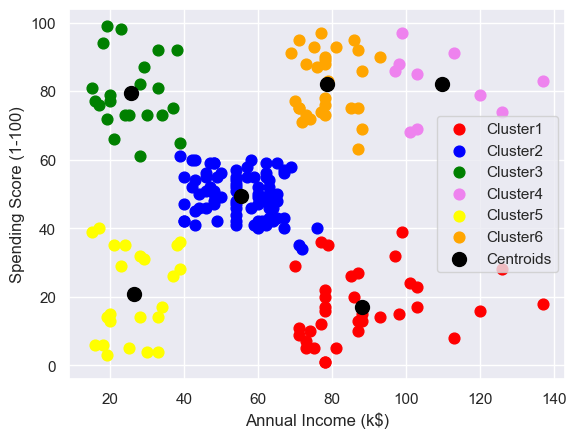

In [71]:
# Training the K-Means model on the dataset 
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42) 
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 60, c = 'orange', label = 'Cluster6') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend() 

plt.show()

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

<Figure size 1000x700 with 0 Axes>

Text(0.5, 1.0, 'Elbow Curve')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Inertia')

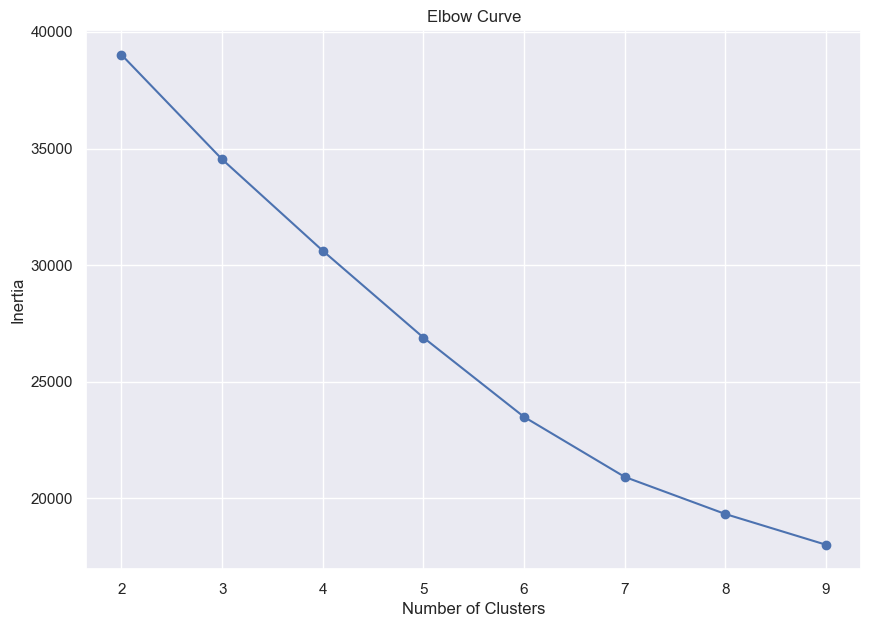

In [72]:
# use my code:

inertias = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertias.append(model.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), inertias, marker="o")
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

We can see from above plot that we can choose K = 2 based on the elbow point in the elbow curve. We can also see from the silhouette score when K = 2, K mean algorithm has the higheset score. As the number of clusters increases, the silhouette score decreases, indicating that the clusters are becoming less distinct and the clustering performance is getting worse. Based on this result, we can conclude that this dataset may have two distinct clusters, and it may not be suitable to have more than two clusters.

### 3. DBSCAN

In [73]:
# use code provided by professor 

Clus_dataSet = df[['Annual_Income','Spending_Score']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
# Compute DBSCAN
db = DBSCAN(eps=0.4, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df['Clus_Db']=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
# A sample of clusters
print(df[['Annual_Income','Spending_Score']].head())
# Number of Labels
print("number of labels: ", set(labels))

   Annual_Income  Spending_Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40
number of labels:  {0, 1, 2, 3, -1}


<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Clustering of Customers, Estimated Number of Clusters: 4')

Text(0.5, 0, 'Annual Income')

Text(0, 0.5, 'Spending Score')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


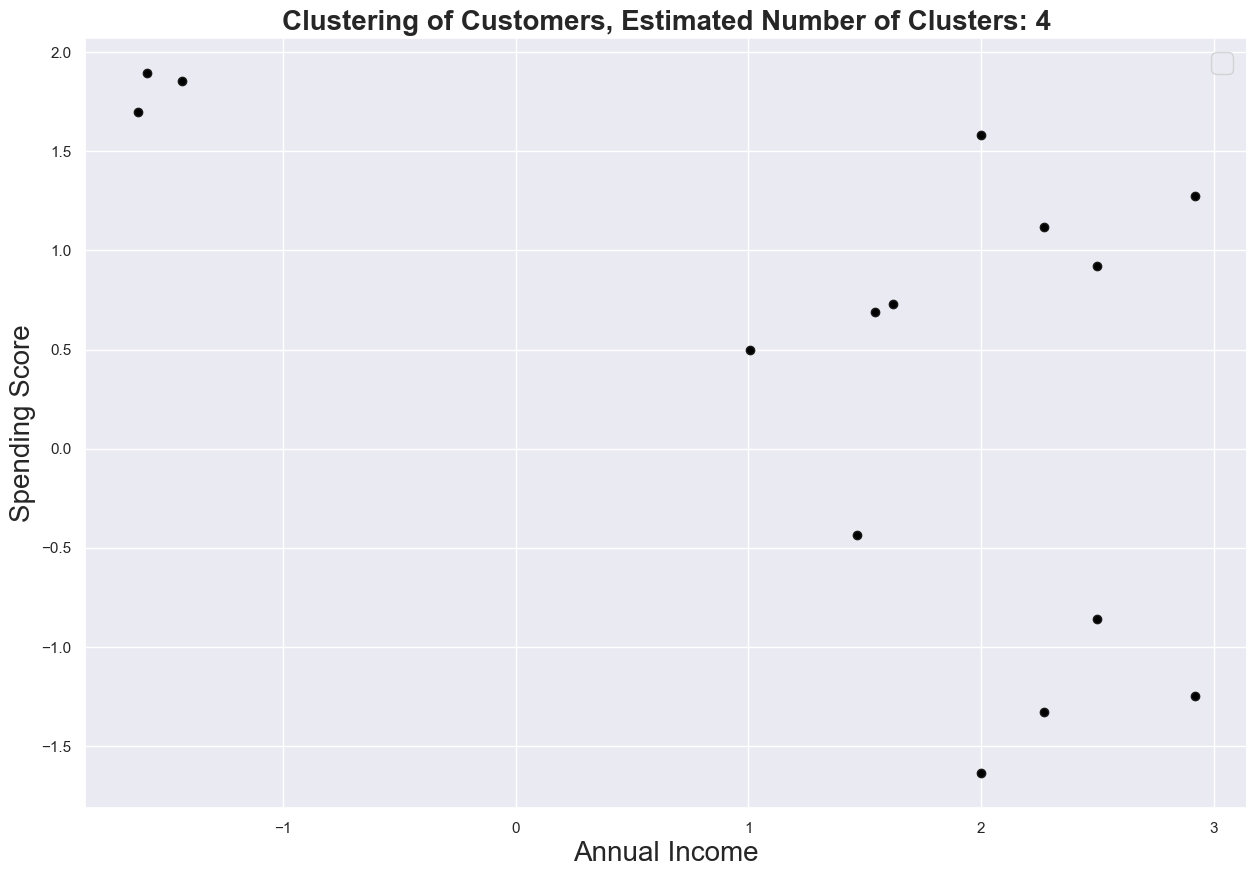

number of noise(s):  15


In [74]:
# Black removed and is used for noise instead
plt.figure(figsize=(15,10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
    # Black used for noise.
        col = [0, 0, 0, 1]
class_member_mask = (labels == k)
xy = Clus_dataSet[class_member_mask & core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)
plt.title('Clustering of Customers, Estimated Number of Clusters: %d' % realClusterNum, fontweight='bold',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend(fontsize=20)
plt.show()
n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

In [75]:
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [76]:
for clust_number in set(labels):
    clust_set = df[df.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg Annual Income: '+ str(round(np.mean(clust_set.Annual_Income)))+\
               ', Avg Spending Score: '+ str(round(np.mean(clust_set['Spending_Score'])))+\
               ', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Annual Income: 48, Avg Spending Score: 52, Count: 114
Cluster 1, Avg Annual Income: 24, Avg Spending Score: 9, Count: 11
Cluster 2, Avg Annual Income: 81, Avg Spending Score: 84, Count: 32
Cluster 3, Avg Annual Income: 84, Avg Spending Score: 14, Count: 27


### 4. Perform PCA

In [77]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

# Perform KMeans clustering on the PCA data
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_data)

# Get the cluster labels
labels = kmeans.predict(pca_data)

# Calculate the Silhouette score
silhouette_avg = silhouette_score(pca_data, labels)
print("The average silhouette_score is :", silhouette_avg)

KMeans(n_clusters=5, random_state=42)

The average silhouette_score is : 0.3880412111243943


Performing PCA before clustering helps to reduce the dimensionality of the dataset, making it easier to visualize and understand the data. In this case, we reduced the 4 original features (Age, Annual Income, Spending Score, and Genre) to just 2 PCA components. We then used KMeans clustering to cluster the data based on these 2 components. 

PCA components can provide insights into which features are most important for clustering. We can examine the PCA components to see which features have the highest weights. For example, the first PCA component may be more heavily influenced by annual income and spending score, while the second PCA component may be more influenced by age and genre.

Overall, performing PCA before clustering can be a useful technique for exploring and understanding high-dimensional datasets.

## Problem 4

a) Can you perform PCA before the clustering methods for these two datasets?
How the cluster results are getting change? Did you find any new patterns or learning from the PCA compoments?

b) The unique values and features are changes rapidly for both of the dataset. What kind of changes you will recommend both dataset proposed model?

I have performed PCA and answered the question a) separately in previous parts. Below is the answer for question b).

For Dataset 1, since the variables have different scales, it might be helpful to normalize the variables before running any model. Additionally, it would be useful to perform exploratory data analysis (EDA) to identify any outliers or missing values that might affect the model's performance. It might also be worth experimenting with different clustering algorithms, such as hierarchical clustering or density-based clustering, to determine which one performs best on this dataset.

For Dataset 2, since the dataset contains categorical variables, it would be necessary to encode them into numerical values before running any clustering algorithm. Additionally, it would be helpful to perform EDA to determine if any variables are highly correlated or if there are any outliers or missing values. It might also be worth experimenting with different clustering algorithms and distance metrics to determine which ones work best for this dataset. Finally, it would be helpful to perform a sensitivity analysis to determine how robust the clusters are to changes in the clustering parameters.